# Visualization with Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python. Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line. IPython's creator, Fernando Perez, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months. John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003. It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib. It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

In recent years, however, the interface and style of Matplotlib have begun to show their age. Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned. Still, I'm of the opinion that we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine. Recent Matplotlib versions make it relatively easy to set new global plotting styles (see Customizing Matplotlib: Configurations and Style Sheets), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (discussed in Visualization With Seaborn), ggpy, HoloViews, Altair, and even Pandas itself can be used as wrappers around Matplotlib's API. Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output. For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

# General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

## Importing Matplotlib

Just as we use the **np** shorthand for NumPy and the **pd** shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The **plt** interface is what we will use most often, as we shall see throughout this chapter.

## Setting Styles

We will use the *plt.style* directive to choose appropriate aesthetic styles for our figures. Here we will set the *classic* style, which ensures that the plots we create use the classic Matplotlib style:

In [ ]:
plt.style.use('classic')

Throughout this section, we will adjust this style as needed. Note that the stylesheets used here are supported as of Matplotlib version 1.5; if you are using an earlier version of Matplotlib, only the default style is available. For more information on stylesheets, see Customizing Matplotlib: Configurations and Style Sheets.

## *show()* or **No** *show()*? How to Display Your Plots
<div style="border: 2px solid red; padding: 10px; border-radius: 5px; background-color: #f8d7da; color: #721c24;">
<strong>!</strong> 'Show or No show' and everything in the introduction beyond that are not part of the course and deleted in this notebook.</div>

## Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y=f(x)$. Here we will take a first look at creating a simple plot of this type. As with all the following sections, we'll start by setting up the notebook for plotting and importing the packages we will use:

In [1]:

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid') #plt.style.use('seaborn-whitegrid')
import numpy as np

For all Matplotlib plots, we start by creating a figure and an axes. In their simplest form, a figure and axes can be created as follows:

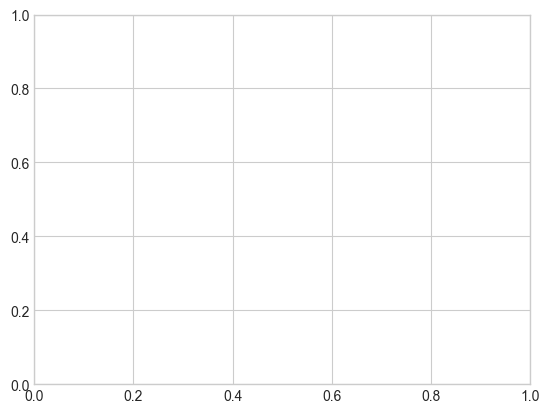

In [2]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the figure (an instance of the class **plt.Figure**) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class **plt.Axes**) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. Throughout this book, we'll commonly use the variable name **fig** to refer to a figure instance, and **ax** to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the **ax.plot** function to plot some data. Let's start with a simple sinusoid:

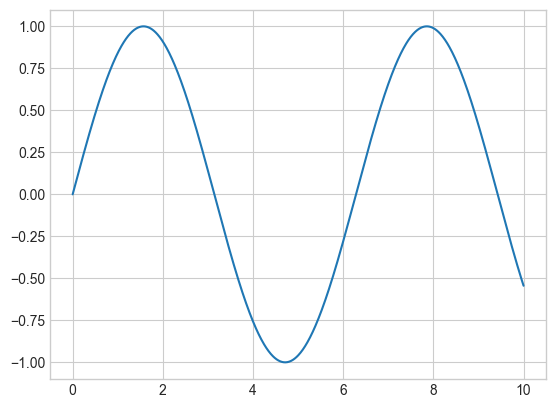

In [3]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background (see Two Interfaces for the Price of One for a discussion of these two interfaces):

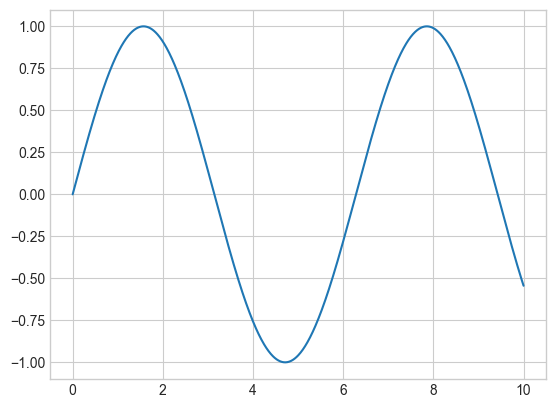

In [9]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the **plot** function multiple times:

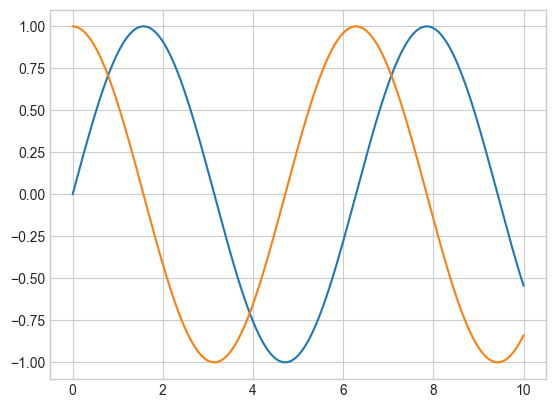

In [10]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

That's all there is to plotting simple functions in Matplotlib! We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles. The **plt.plot()** function takes additional arguments that can be used to specify these. To adjust the color, you can use the **color** keyword, which accepts a string argument representing virtually any imaginable color. The color can be specified in a variety of ways:



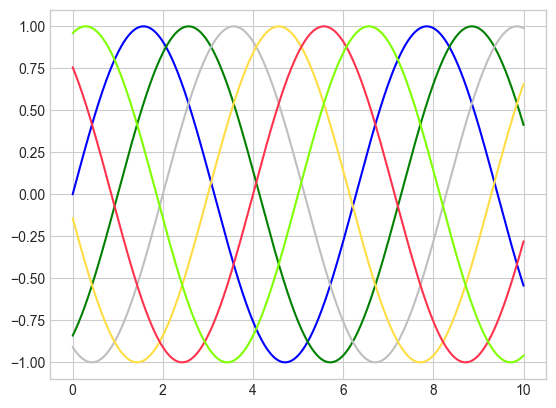

In [11]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the **linestyle** keyword:

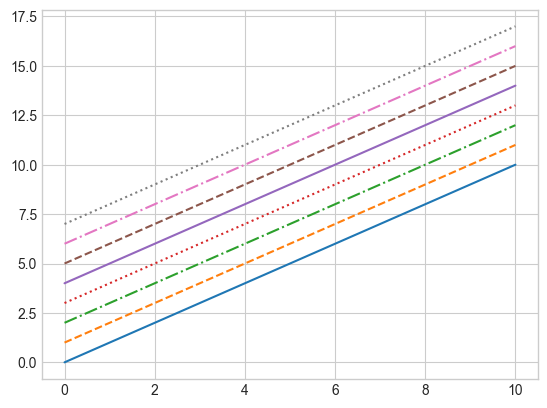

In [12]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these **linestyle** and **color** codes can be combined into a single non-keyword argument to the **plt.plot()** function:



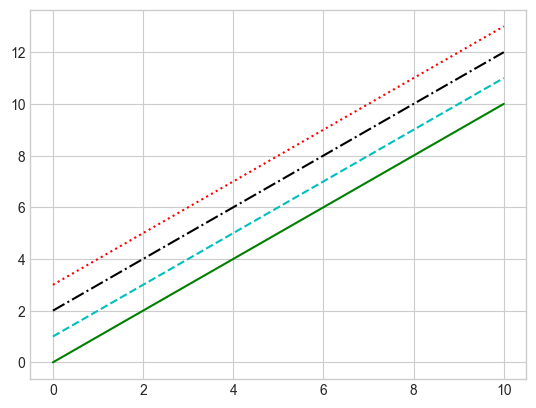

In [13]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; for more details, I'd suggest viewing the docstring of the plt.plot() function using IPython's help tools.

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control. The most basic way to adjust axis limits is to use the **plt.xlim()** and **plt.ylim()** methods:

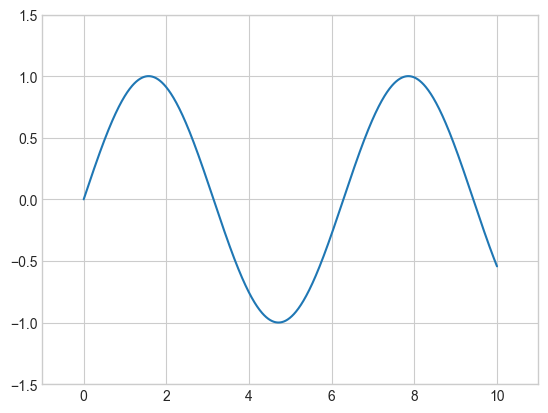

In [15]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:



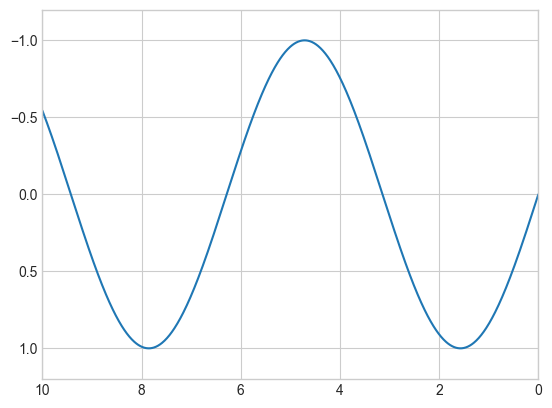

In [16]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is **plt.axis()** (note here the potential confusion between axes with an *e*, and *axis* with an *i*). The **plt.axis()** method allows you to set the **x** and **y** limits with a single call, by passing a list which specifies **[xmin, xmax, ymin, ymax]**:



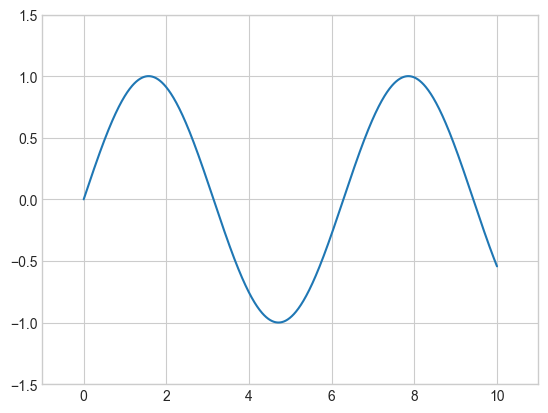

In [17]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

The **plt.axis()** method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

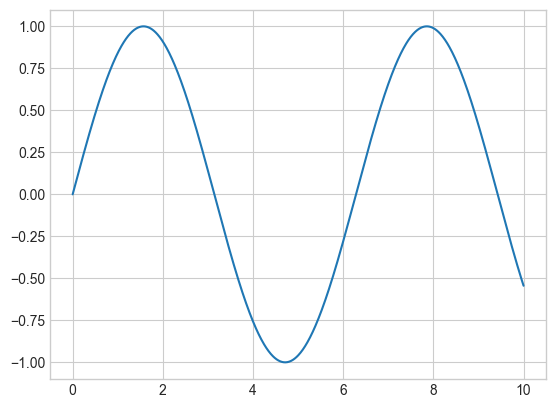

In [18]:
plt.plot(x, np.sin(x))
plt.axis('tight');

It allows even higher-level specifications, such as ensuring an equal aspect ratio so that on your screen, one unit in **x** is equal to one unit in **y**:

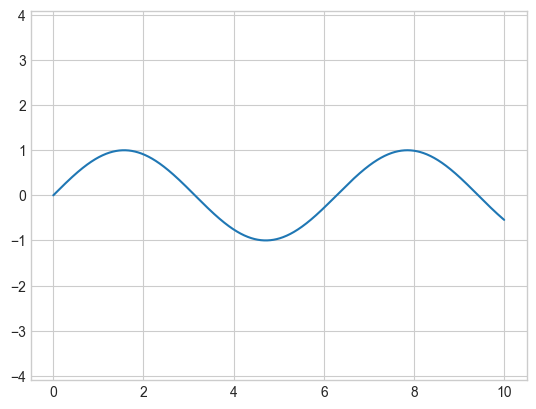

In [19]:
plt.plot(x, np.sin(x))
plt.axis('equal');

For more information on axis limits and the other capabilities of the **plt.axis** method, refer to the **plt.axis** docstring.


# Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:



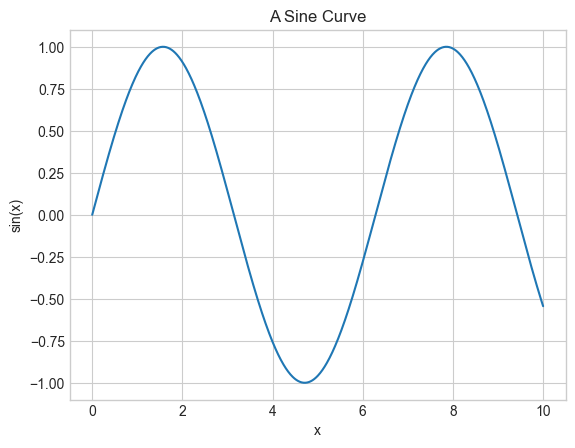

In [21]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function. For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. Again, Matplotlib has a built-in way of quickly creating such a legend. It is done via the (you guessed it) **plt.legend()** method. Though there are several valid ways of using this, I find it easiest to specify the label of each line using the label keyword of the plot function:

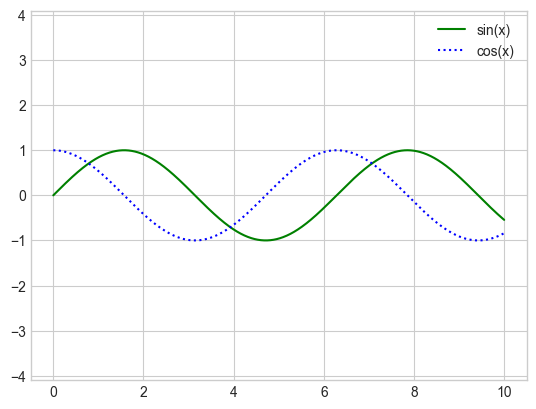

In [22]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

As you can see, the **plt.legend()** function keeps track of the line style and color, and matches these with the correct label. More information on specifying and formatting plot legends can be found in the **plt.legend** docstring; additionally, we will cover some more advanced legend options in Customizing Plot Legends.

# Aside: Matplotlib Gotchas


While most **plt** functions translate directly to ax methods (such as **plt.plot()** → **ax.plot()**, **plt.legend()** → **ax.legend()**, etc.), this is not the case for all commands. In particular, functions to set limits, labels, and titles are slightly modified. For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:


    plt.xlabel() → ax.set_xlabel()
    plt.ylabel() → ax.set_ylabel()
    plt.xlim() → ax.set_xlim()
    plt.ylim() → ax.set_ylim()
    plt.title() → ax.set_title()

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the **ax.set()** method to set all these properties at once:

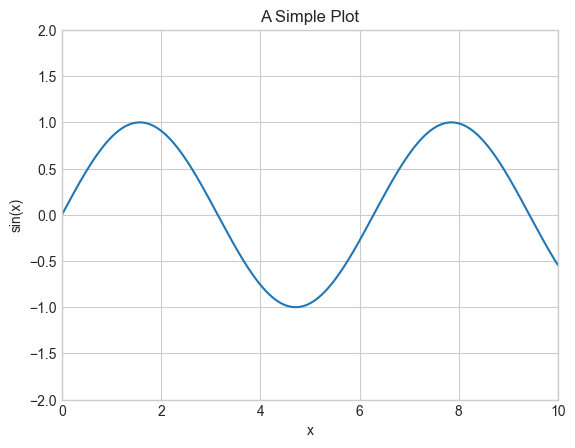

In [23]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Matplotlib Practice


### 1: Simple Line Chart


In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data
days = np.array([1, 2, 3, 4, 5, 6, 7])  # Days of the week
sales_this_week = np.array([150, 200, 250, 220, 300, 400, 380])  # This week's sales
sales_last_week = np.array([130, 180, 230, 210, 220, 390, 420])  # Last week's sales

a) Create a simple line plot using NumPy where:

- The x-axis represents days of the week (1 to 7).
- The y-axis represents daily sales from this week in euros.
- The line should be blue and solid ('b-').
- Add labels for the x and y axes and a title.
- Replace the integers on the x-axis by labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"] (you can use plt.xticks() for this).
- Plot grid lines (you can use plt.grid() for this)

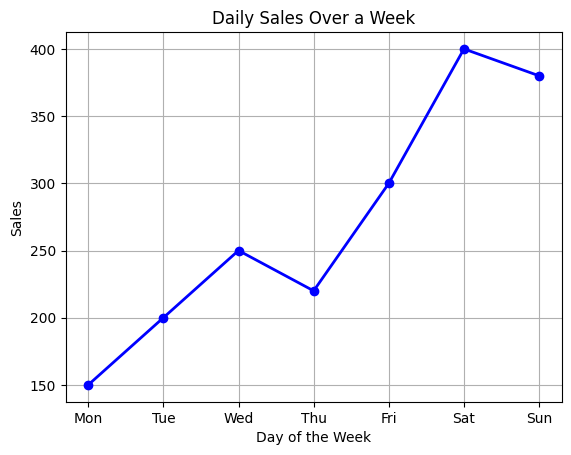

In [54]:
#START_SOLUTION
# Create line plot
plt.plot(days, sales_this_week, 'b-', linewidth=2, marker='o')
plt.xlabel("Day of the Week")
plt.ylabel("Sales")
plt.title("Daily Sales Over a Week")
plt.xticks(days, labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.grid(True)
plt.show()
#END_SOLUTION

b) Now add a second line to the plot illustrating sales from last week.

- Make the second line red and dotted
- Add a legend to explain which color is this week and which one last week

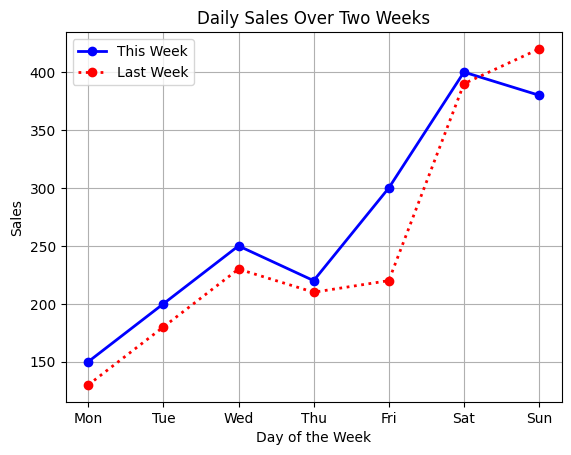

In [55]:

# Create line plot
plt.plot(days, sales_this_week, 'b-o', linewidth=2, label="This Week")  # Blue line
plt.plot(days, sales_last_week, 'r:o', linewidth=2, label="Last Week")  # Red line

# Labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Sales")
plt.title("Daily Sales Over Two Weeks")
plt.xticks(days, labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.grid(True)
plt.legend()  # Add legend

# Show plot
plt.show()

### 2: Line Plots with Flight Data


In [56]:
import pandas as pd

# Load dataset
flights  = pd.read_csv('../../datasets/airlines.csv', sep=',')
flights.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


a) Look at the 'Departure Date' column. Replace all the '/' characters by '-' in this column. Create a new column 'Departure Month' with only the 1st part (= month) of the column 'Departure Date' and 'int8' as data type (you can use .astype() for this).

In [57]:
#SOLUTION_START
# replace "/" by "-"
flights['Departure Date'] = flights['Departure Date'].str.replace("/","-")
# get first part out of the date as integer and store in new column
flights['Departure Month'] = flights['Departure Date'].str.split('-').str.get(0).astype('int8')
#SOLUTION_END

b) Show the total number of passengers for all the months (in year 2022) in a line chart

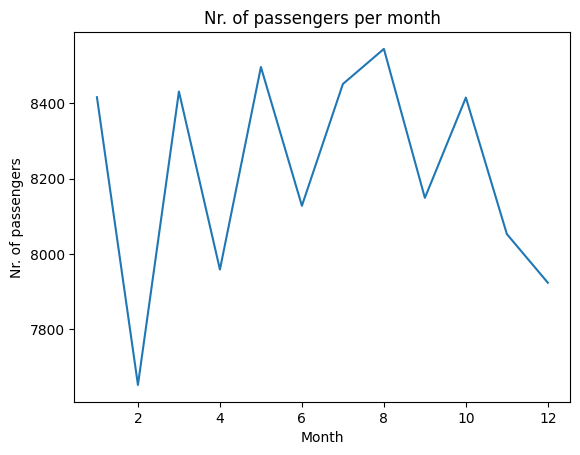

In [58]:
#SOLUTION_START
# aggregate data to number of flights per month
passenger_count = flights.groupby('Departure Month').aggregate({'Passenger ID':'count'})
#plot the results
plt.plot(passenger_count.index, passenger_count["Passenger ID"])
plt.xlabel("Month")
plt.ylabel("Nr. of passengers")
plt.title('Nr. of passengers per month')
plt.show()
#SOLUTION_END

c) Adjust the plot so:
- It has a wider width (you can use plt.figure(figsize=...) for this).
- The y-axis goes from 7000 to 9000 (you can use plt.ylim() for this).
- Replace the integers on the x-axis by labels=["Jan", "Feb", "Mar", ...] (you can use plt.xticks() for this).


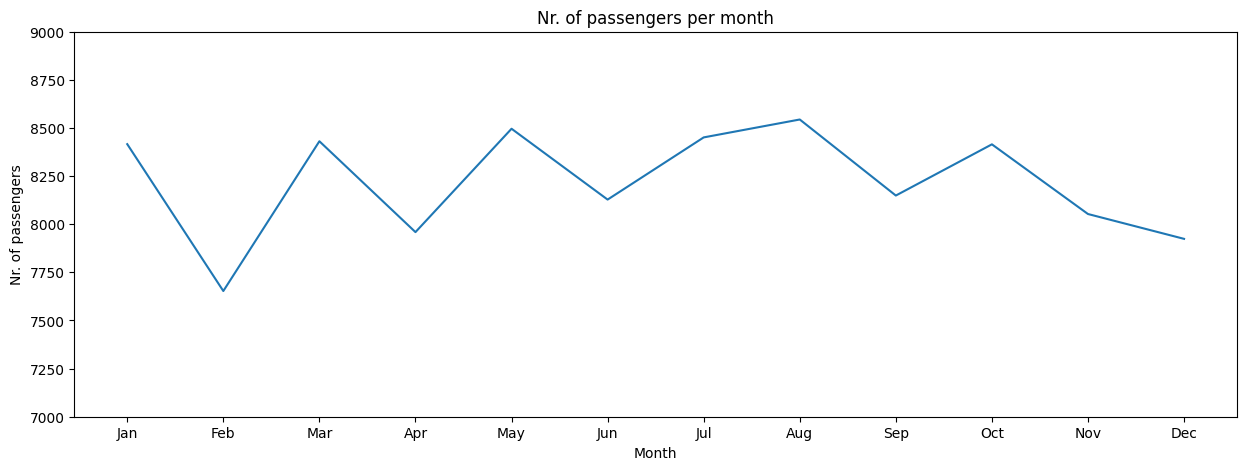

In [59]:
#SOLUTION_START
#Build the plot with a set figsize
plt.figure(figsize=(15, 5))

plt.plot(passenger_count.index,passenger_count['Passenger ID'])
plt.xlabel("Month")
plt.ylabel("Nr. of passengers")
plt.title('Nr. of passengers per month')

#Add the x and y-axis limits
plt.ylim(7000,9000)
plt.xticks(passenger_count.index, labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()
#SOLUTION_END

Great!


# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape. We’ll start by setting up the notebook for plotting and importing the functions we will use:


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

## Scatter Plots with **plt.plot**

In the previous section we looked at **plt.plot**/**ax.plot** to produce line plots. It turns out that this same function can produce scatter plots as well:



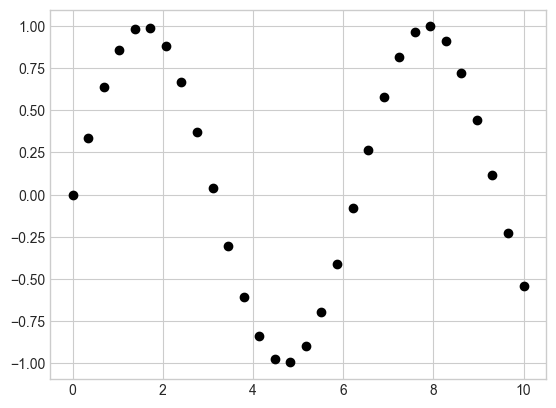

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as '-', '--' to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of **plt.plot**, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

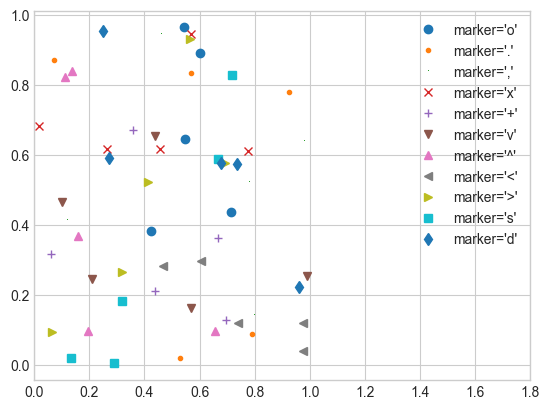

In [ ]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:



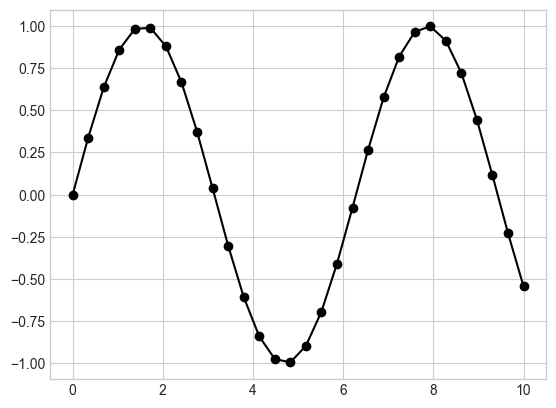

In [ ]:
plt.plot(x, y, '-ok');

Additional keyword arguments to **plt.plot** specify a wide range of properties of the lines and markers:


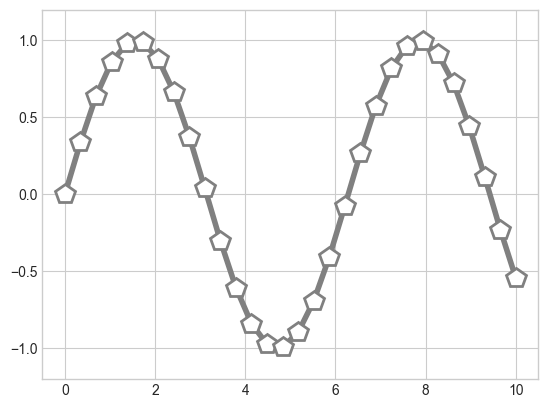

In [ ]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

This type of flexibility in the **plt.plot** function allows for a wide variety of possible visualization options. For a full description of the options available, refer to the **plt.plot** documentation.



## Scatter Plots with **plt.scatter**


A second, more powerful method of creating scatter plots is the **plt.scatter** function, which can be used very similarly to the **plt.plot** function:



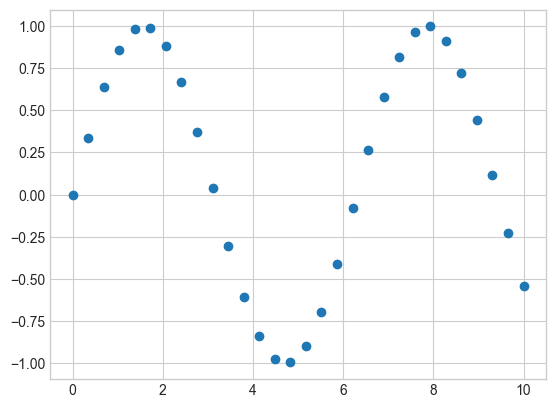

In [ ]:
plt.scatter(x, y, marker='o');

The primary difference of **plt.scatter** from **plt.plot** is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes. In order to better see the overlapping results, we'll also use the alpha keyword to adjust the transparency level:

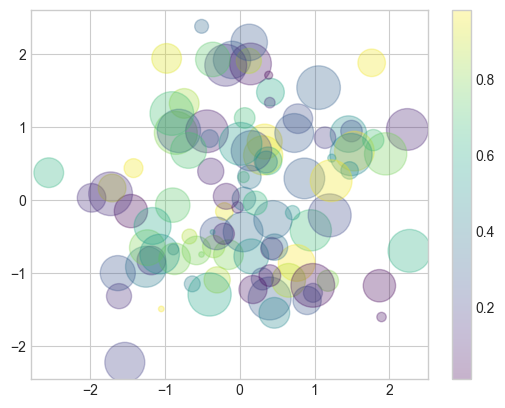

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the **colorbar()** command), and that the size argument is given in pixels. In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

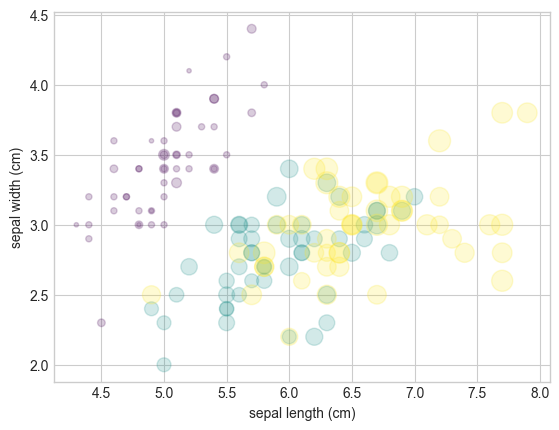

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower. Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.



# **plot** Versus **scatter**: A Note on Efficiency

Aside from the different features available in **plt.plot** and **plt.scatter**, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, plt.plot can be noticeably more efficient than **plt.scatter**. The reason is that plt.scatter has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In **plt.plot**, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, plt.plot should be preferred over **plt.scatter** for large datasets.



# Matplotlib Practice

### 1: Basic Scatterplot

a) Import the pyplot module from matplotlib as plt

In [6]:
#SOLUTION_START
import matplotlib.pyplot as plt
#SOLUTION_END


b) Create a simple scatter plot using NumPy where:

- The x-axis represents 50 random values between 0 and 1 for feature A.

- The y-axis represents 50 random values between 0 and 1 for feature B.

- Use Matplotlib's scatter function

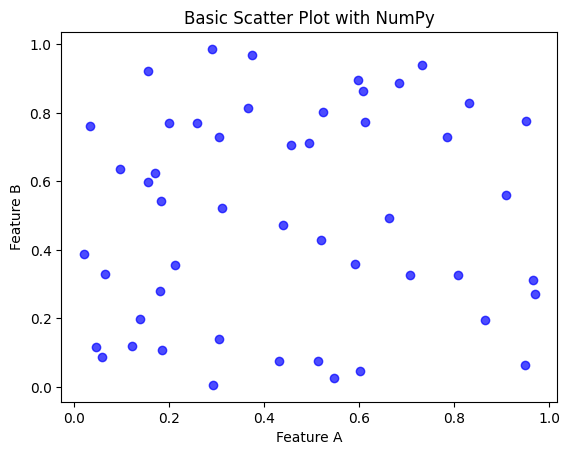

In [7]:
#SOLUTION_START

import numpy as np

# Generate random data
np.random.seed(42)
x = np.random.rand(50)
y = np.random.rand(50)

# Create scatter plot
plt.scatter(x, y, color='blue', alpha=0.7)
plt.xlabel("Feature A")
plt.ylabel("Feature B")
plt.title("Basic Scatter Plot with NumPy")
plt.show()

#SOLUTION_END

### 2: city population exploration

a) import needed libaries here and read in the california_cities.csv file.

In [8]:
#SOLUTION_START

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
data  = pd.read_csv('../../datasets/california_cities.csv', sep=',')
data.head()

#SOLUTION_END

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


b) Make a scatterplot where you compare the Population to the Area in km squared.

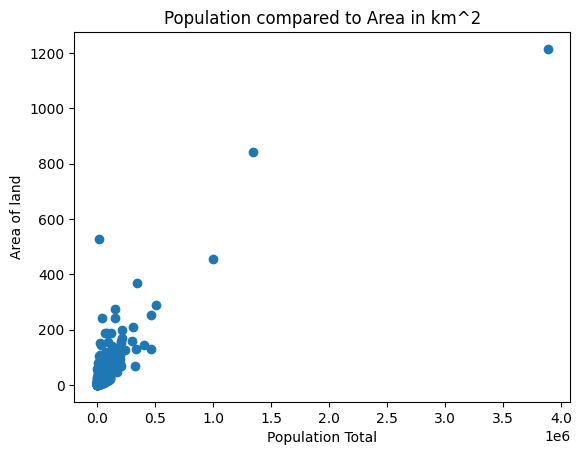

In [9]:
#SOLUTION_START

plt.scatter(data['population_total'],data['area_land_km2'])
plt.xlabel("Population Total")
plt.ylabel("Area of land")
plt.title("Population compared to Area in km^2")
plt.show()

#SOLUTION_END

### 3: Scatterplot with Iris dataset

Import the Iris dataset:

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris_bunch = load_iris(as_frame=True)
iris = pd.DataFrame(iris_bunch.data.to_numpy(), index=np.arange(1, 151), columns=iris_bunch.data.columns)
iris['species'] = iris_bunch.target

a) Create a scatter plot using the Iris dataset where:

- The x-axis represents sepal length.

- The y-axis represents sepal width.

- The points are colored based on the species of the iris flower (use parameter c=... in plt.scatter()).

- Plot the colorbar with a correct label

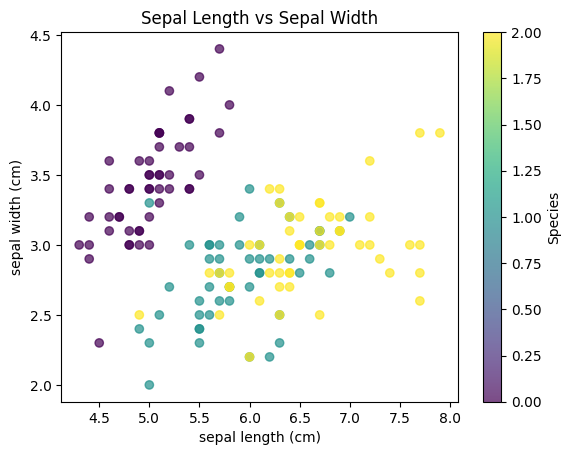

In [11]:
#SOLUTION_START

# Create scatter plot
plt.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=iris['species'], alpha=0.7)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title("Sepal Length vs Sepal Width")
plt.colorbar(label='Species')
plt.show()
#SOLUTION_END


b) Modify the scatter plot so that:

- The size of each point represents the petal width (use parameter s=... in plt.scatter()).

- Keep the color mapping based on species.

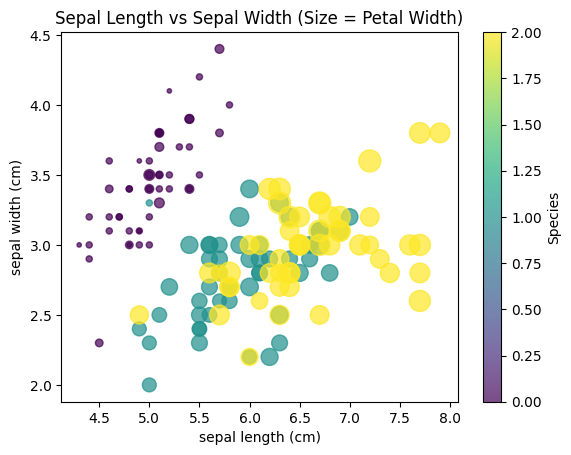

In [12]:
#SOLUTION_START

plt.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=iris['species'], s=100 * iris['petal width (cm)'], cmap='viridis', alpha=0.7)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title("Sepal Length vs Sepal Width (Size = Petal Width)")
plt.colorbar(label='Species')
plt.show()

#SOLUTION_END

# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset. Earlier, we saw a preview of Matplotlib's histogram function, which creates a basic histogram in one line, once the normal boiler-plate imports are done:



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

data = np.random.randn(1000)

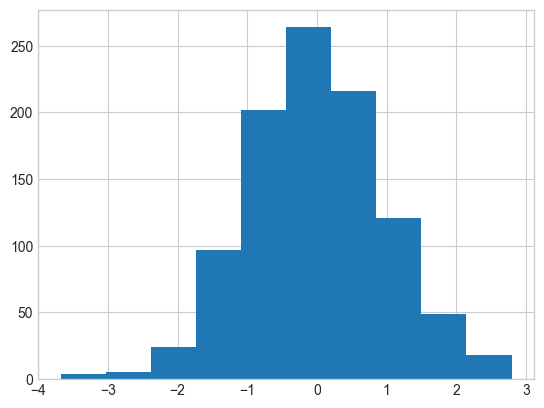

In [ ]:
plt.hist(data);

The **hist()** function has many options to tune both the calculation and the display; here's an example of a more customized histogram:



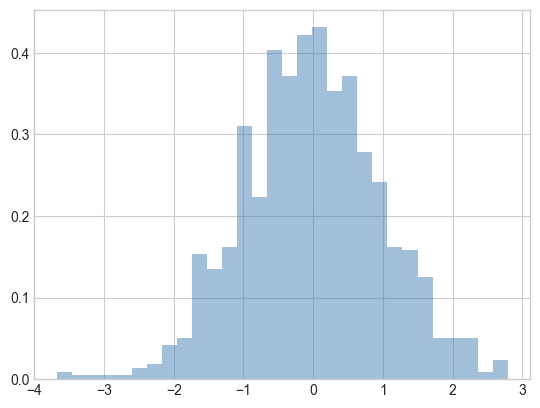

In [ ]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none'); #normed=True

The **plt.hist** docstring has more information on other customization options available. I find this combination of **histtype='stepfilled'** along with some transparency **alpha** to be very useful when comparing histograms of several distributions:

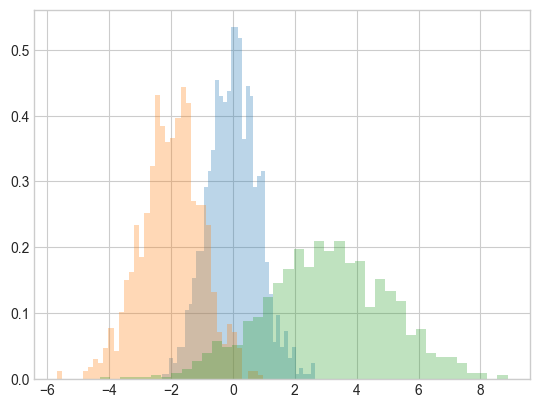

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the **np.histogram()** function is available:



In [ ]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[  9 121 466 337  67]


# Two-Dimensional Histograms and Binnings
<div style="border: 2px solid red; padding: 10px; border-radius: 5px; background-color: #f8d7da; color: #721c24;">
<strong>!</strong> Two-Dimensional Histograms and Binnings are not part of the course and deleted in this notebook.</div>

# Matplotlib Practice

### 1: Basic Histogram

Imports and generating some data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-whitegrid')

# Generate random data
data = np.random.randn(1000)


a) Create a histogram using the randomly generated data from above.

- Use 30 bins.

- Set alpha=0.5 for transparency.

- Use histtype='stepfilled'.

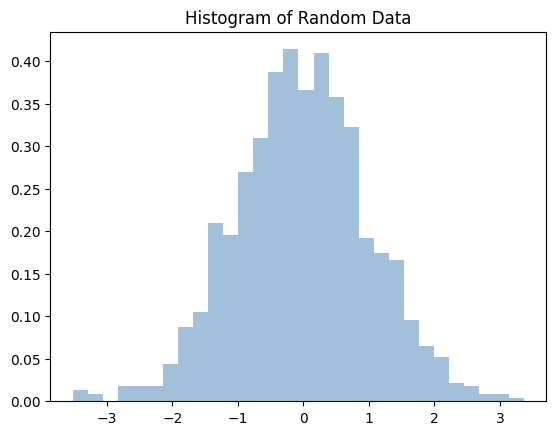

In [19]:
#SOLUTION_START

# Create histogram
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue', edgecolor='none')
plt.title("Histogram of Random Data")
plt.show()

#SOLUTION_END

### 2: Histogram with Iris dataset

import needed libaries and iris dataset.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris_bunch = load_iris(as_frame=True)
iris = pd.DataFrame(iris_bunch.data.to_numpy(), index=np.arange(1, 151), columns=iris_bunch.data.columns)
iris['species'] = iris_bunch.target


a) Create a histogram of sepal length from the Iris dataset.

- Use 20 bins.

- Set transparency to 0.7.

- Change the color to 'purple'.

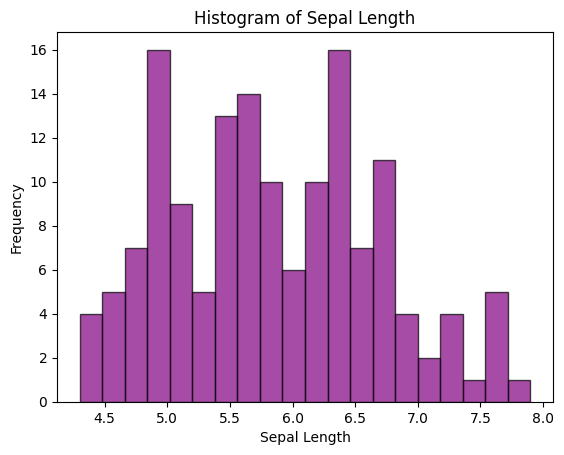

In [4]:
#SOLUTION_START

plt.hist(iris['sepal length (cm)'], bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Length")
plt.show()

#SOLUTION_END

b) Now plot sepal length histograms for each species separately.
- Use different colors for each species.
- Add a legend to distinguish species.
- Use 15 bins per species
- Set transparency to 0.3.

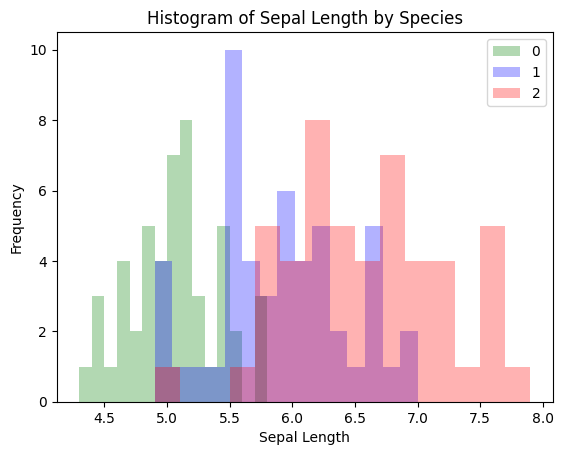

In [27]:
#SOLUTION_START

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=15) # kwargs = {'histtype':'stepfilled', 'alpha'=0.3, 'bins'=15}

plt.hist(iris.loc[iris['species'] == 0, 'sepal length (cm)'], label='0', **kwargs, color='green')
plt.hist(iris.loc[iris['species'] == 1, 'sepal length (cm)'], label='1', **kwargs, color='blue')
plt.hist(iris.loc[iris['species'] == 2, 'sepal length (cm)'], label='2', **kwargs, color='red')


plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Length by Species")
plt.legend()
plt.show()

#SOLUTION_END

# Visualization with Seaborn


Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired. There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.

- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.

- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrames. In order to visualize data from a Pandas DataFrame, you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas **DataFrame**s.

To be fair, the Matplotlib team is addressing this: it has recently added the **plt.style** tools discussed in Customizing Matplotlib: Configurations and Style Sheets, and is starting to handle Pandas data more seamlessly. The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo. But for all the reasons just discussed, Seaborn remains an extremely useful addon.

## Seaborn Versus Matplotlib


Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors. We start with the typical imports:



In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Now we create some random walk data:



In [3]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

And do a simple plot:



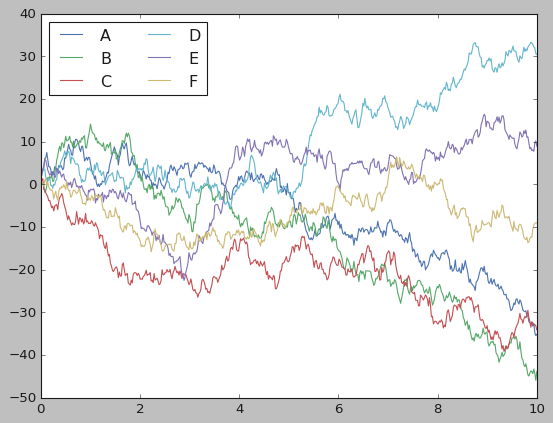

In [41]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn. As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's **set()** method. By convention, Seaborn is imported as **sns**:

In [42]:
import seaborn as sns
sns.set()

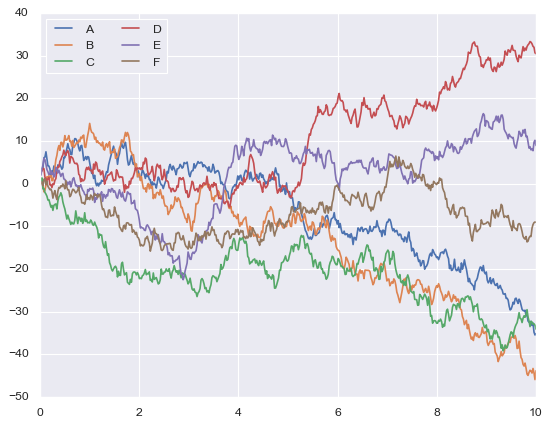

In [43]:

# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Ah, much better!



## Exploring Seaborn Plots


The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following could be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

## Histograms, KDE, and densities
<div style="border: 2px solid red; padding: 10px; border-radius: 5px; background-color: #f8d7da; color: #721c24;">
<strong>!</strong> Two-Dimensional Histograms and Binnings are not part of the course and deleted in this notebook.</div>

# Seaborn Practice

### 1: Simple Bar Chart with Seaborn

a) Import Matplotlib and Seaborn

In [2]:
#SOLUTION_START
import seaborn as sns
import matplotlib.pyplot as plt
#SOLUTION_END


b) Using Seaborn and Matplotlib, create a bar chart based on randomly generated data.

- Create a Python list with 5 categories labeled 'A', 'B', 'C', 'D', 'E'.
- Generate 5 random integer values between 1 and 20 using numpy.random.randint().
- Use Seaborn's barplot to create a bar chart.
- Add a title and axis labels using Matplotlib.

<Axes: >

Text(0.5, 1.0, 'Random Bar Chart with Seaborn')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Values')

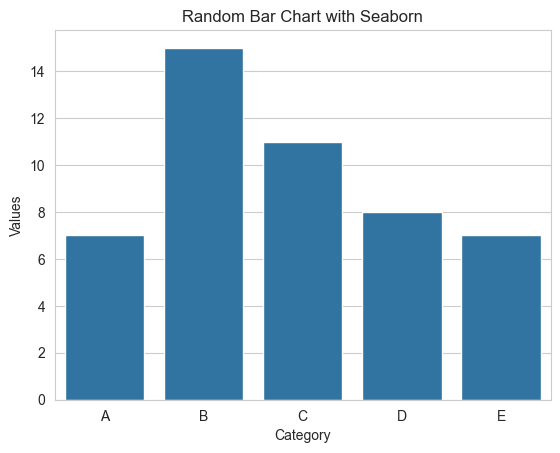

In [3]:
#SOLUTION_START

import numpy as np

# Generate random data
np.random.seed(42)
categories = ['A', 'B', 'C', 'D', 'E']
values = np.random.randint(1, 20, size=5)

# Create a bar plot
sns.barplot(x=categories, y=values)

# Adding a title and labels
plt.title("Random Bar Chart with Seaborn")
plt.xlabel("Category")
plt.ylabel("Values")

# Display the plot
plt.show()

#SOLUTION_END

### 2: Barchart with Cities dataset

import needed libaries and load cities dataset.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load dataset
cities  = pd.read_csv('../../../datasets/california_cities.csv', sep=',')
cities.head()


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


a) Create a barchart to display the population per city.

- Only display the 5 cities with the highest population.
- Make the bars a purple color

<Axes: xlabel='city', ylabel='population_total'>

Text(0.5, 0, 'city')

Text(0, 0.5, 'population')

Text(0.5, 1.0, 'population per city')

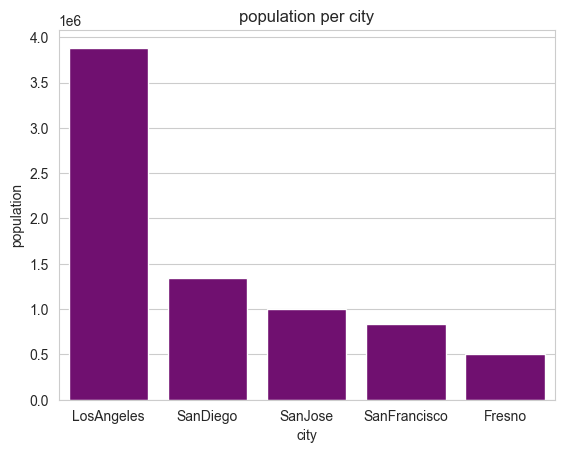

In [7]:
#SOLUTION_START
# Sort the dataset by population in descending order and select the top 5 cities
top_cities = cities.sort_values(by='population_total', ascending=False).head(5)

#Create the barchart
sns.barplot(x=top_cities['city'], y=top_cities['population_total'], color='purple')
#or alternatively use data parameter in combination with column names
#sns.barplot(data=top_cities, x='city', y='population_total', color='purple')
plt.xlabel("city")
plt.ylabel("population")
plt.title("population per city")
plt.show()

#SOLUTION_END

### 3: Simple Boxplot with Seaborn
a) Create a boxplot to display some more randomly generated data
- Generate 20 random integer values between 1 and 100 using numpy.random.randint().
- Use Seaborn's boxplot to create a boxplot.



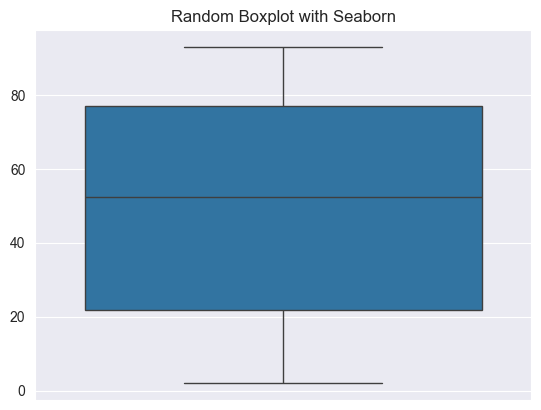

In [21]:
#SOLUTION_START
# Generate random data
np.random.seed(42)
data = np.random.randint(1, 100, size=20)

# Create a bar plot
sns.boxplot(y=data)

# Adding a title and labels
plt.title("Random Boxplot with Seaborn")

# Display the plot
plt.show()
#SOLUTION_END

imports and loading the laptops dataset

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load dataset
flights  = pd.read_csv('../../../datasets/flights.csv', sep=',')
flights.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


a) Create a horizontal boxplot to visualize the dispersion of flight distances.

<Axes: xlabel='distance'>

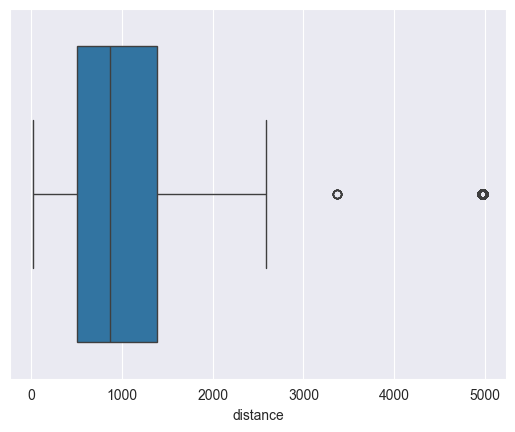

In [61]:
#SOLUTION_START

sns.boxplot(x=flights['distance'])

#SOLUTION_END

a) Split the boxplot by airliner(name) so you can compare the distances flown by each airliner.

<Axes: xlabel='distance', ylabel='name'>

Text(0.5, 0, 'distance')

Text(0, 0.5, 'name')

Text(0.5, 1.0, 'Distances flown per Airliner')

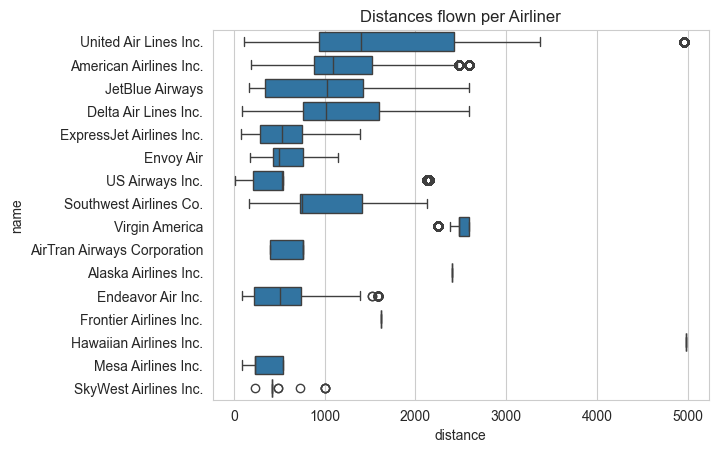

In [9]:
#SOLUTION_START

#sns.boxplot(y=flights['name'], x=flights['distance'])
#or alternatively use data parameter in combination with column names
sns.boxplot(data=flights, y='name', x='distance')
plt.xlabel("distance")
plt.ylabel("name")
plt.title("Distances flown per Airliner")
plt.show()

#SOLUTION_END

# 4 - Data Visualization - Review Exercise

### 1: Imports/Loading data

a) Import all needed libraries here

In [3]:
#SOLUTION_START
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#SOLUTION_END


In this exercise, we are going to explore the imdb movies dataset using different visualization techniques learned in chapter 4.

b) Load the imdb_movies dataset into a pandas DataFrame and show the first 5 rows.

In [5]:
#SOLUTION_START

# Load dataset
movies  = pd.read_csv('../../datasets/imdb_movies.csv', sep=',', encoding="latin")
movies.head()
movies.info()

#SOLUTION_END

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama,Â Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction,Â Adventure,Â Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe SaldaÃ±a, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation,Â Adventure,Â Family,Â Fantasy,Â Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation,Â Comedy,Â Family,Â Adventure,Â Fantasy","Through a series of unfortunate events, three ...","Ãscar BarberÃ¡n, Thut (voice), Ana Esther Alb...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


### 2: Movie scores



a) What is the average score of all movies?

In [3]:
#SOLUTION_START
movies['score'].mean()
#SOLUTION_END

63.49705246610336

b) Make a histogram of the movie scores

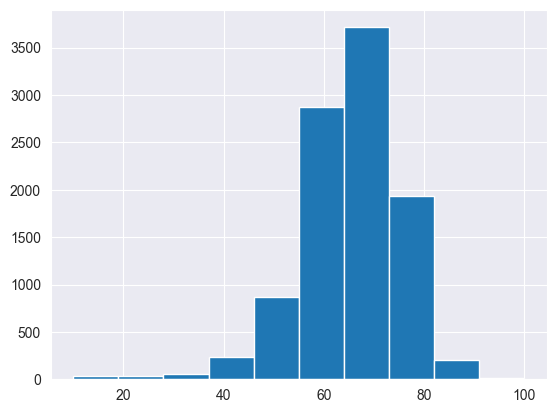

In [111]:
#SOLUTION_START
plt.hist(movies['score'])
plt.show()
#SOLUTION_END

c) We want to visualize which years had the best movies.
 - You have to make a new column containing only the year (last part of 'date column') with 'int16' as data type (you can use .astype() for this).
 - Make sure you delete all scores that are 0, for those are scores that were never filled in
- Plot the average score per year in a line chart with figsize = (15,5)

Text(0.5, 1.0, 'Average movie scores per year')

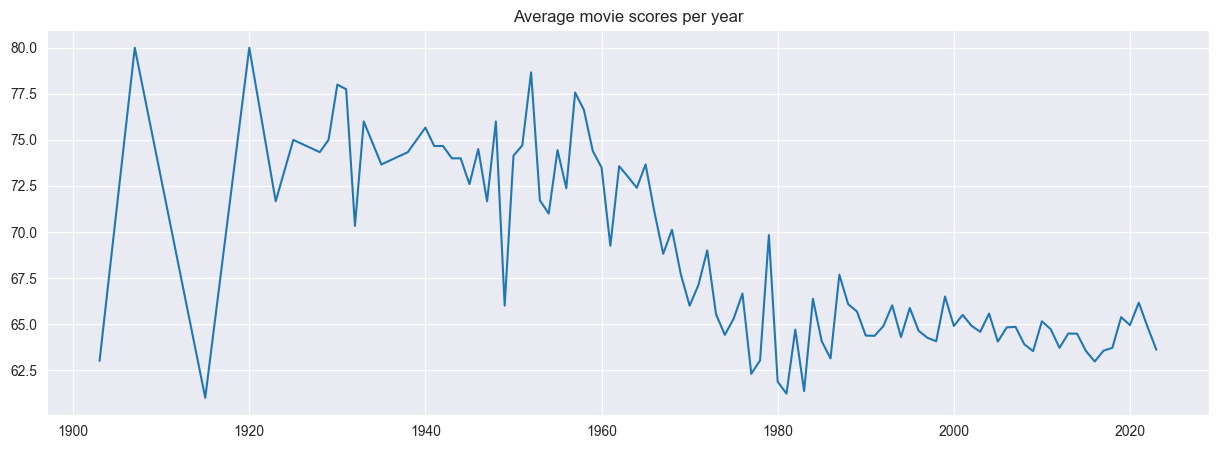

In [112]:
#SOLUTION_START
#Create year column
movies['year'] = movies['date_x'].str.split('/').str.get(2).astype('int16')

#Remove scores that are 0 from the dataset
movies = movies[movies['score']!=0]

#Aggregate data to average score per year
score_years = movies.groupby('year').aggregate({'score':'mean'})
plt.figure(figsize=(15,5))
plt.plot(score_years.index, score_years['score'])
plt.title('Average movie scores per year')
#SOLUTION_END

### 3: Movie budget

a) We want to know what the dispersion of the column 'budget_x' looks like. Make a boxplot to visualize this.

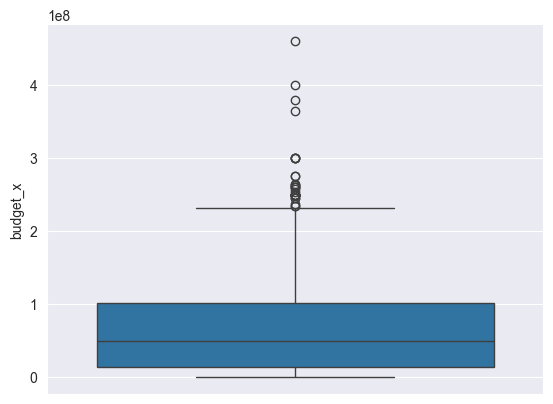

In [110]:
#SOLUTION_START
sns.boxplot(y=movies.budget_x)
plt.show()
#SOLUTION_END

b) Show 5 movies with the highest budget, use a horizontal barchart and show the movie names.

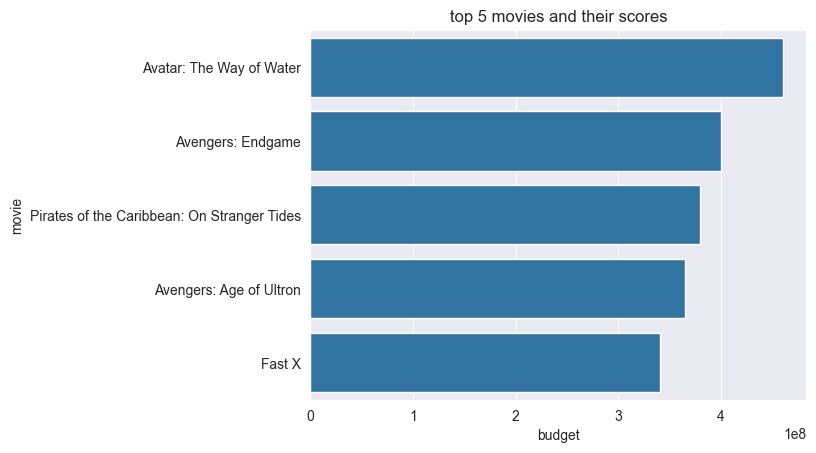

In [5]:
#SOLUTION_START

# Sort the dataset by population in descending order and select the top 5 cities
expensive_movies = movies.sort_values(by='budget_x', ascending=False).head(5)

#Create the barchart
sns.barplot(y=expensive_movies['names'], x=expensive_movies['budget_x'])
plt.xlabel("budget")
plt.ylabel("movie")
plt.title("top 5 movies and their scores")
plt.show()

#SOLUTION_END

c) Let's take a look if these expensive movies resulted in a higher revenue.
- Make a scatterplot to visualize the relationship between budget and revenue.
- Set transparency of the dots to 0.3


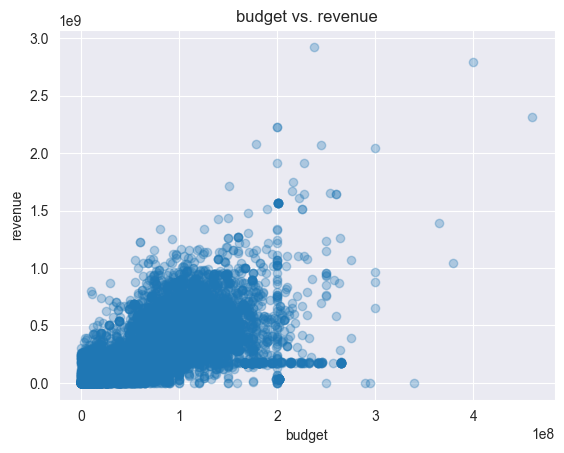

In [6]:
#SOLUTION_START
plt.scatter(movies['budget_x'], movies['revenue'], alpha=0.3)
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title("budget vs. revenue")
plt.show()
#SOLUTION_END